# <center>IAI5101: Foundations of Machine Learning for Engineers & Scientists</center>

## <center>Assignment 2</center>
### <center>Done By</center>
### <center>Yusri Al-Sanaani</center>
### <center>ID: 300216450</center>

# Import libraries

In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from itertools import product

from sklearn import model_selection
from mlxtend.classifier import EnsembleVoteClassifier
import xgboost as xgb

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [219]:
#importing visualization libraries
sns.set_theme(style='darkgrid', context='talk')
%matplotlib inline

# Loading and Checking Dataset

In [689]:
data = pd.read_csv('heart.csv')

In [646]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [647]:
data.shape # The dataset contains 12 variables and 918 observations

(918, 12)

In [648]:
data.columns # Let check the columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [649]:
data.dtypes # Ckeck data type, the data contains numeriacal and categorical variables

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [650]:
# Check the number pf unique values for each variable
data.nunique().to_frame().rename(columns={0: 'Unique Values for Each Variable'})

,Unique Values for Each Variable
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [651]:
# Let's get descriptive statistics summary for numerical variables.
# HeartDisease is the target variable and it has to classes: 0, 1
# There outliers in the data, for example, 0 RestingBP, 0 Cholesterol, -2.600000 Oldpeak
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [652]:
# Let's get descriptive statistics summary for categorical variables.
data.describe(include=[object]) 

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [653]:
# We also can summarize the data using DataFrameSummary()
from pandas_summary import DataFrameSummary
df_info = DataFrameSummary(data)
df_info.summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
Age,918.0,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0,918,50,0,0%,numeric
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918,2,0,0%,bool
ChestPainType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918,4,0,0%,categorical
RestingBP,918.0,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0,918,67,0,0%,numeric
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0,918,222,0,0%,numeric
FastingBS,918.0,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0,918,2,0,0%,bool
RestingECG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918,3,0,0%,categorical
MaxHR,918.0,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0,918,119,0,0%,numeric
ExerciseAngina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918,2,0,0%,bool
Oldpeak,918.0,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2,918,53,0,0%,numeric


In [130]:
# Also, we can manipulate a summary as follows:

df_info = pd.DataFrame(columns=['Variable', 'Number of Null', 'Data Type', 'Number of Unique Values'])

for i in range(0, len(data.columns)):
    df_info.loc[i] = [data.columns[i],
                      data[data.columns[i]].isnull().sum(),
                      data[data.columns[i]].dtypes,
                      data[data.columns[i]].nunique()]
    
df_info

,Variable,Number of Null,Data Type,Number of Unique Values
0,Age,0,int64,50
1,Sex,0,object,2
2,ChestPainType,0,object,4
3,RestingBP,0,int64,67
4,Cholesterol,0,int64,222
5,FastingBS,0,int64,2
6,RestingECG,0,object,3
7,MaxHR,0,int64,119
8,ExerciseAngina,0,object,2
9,Oldpeak,0,float64,53


In [131]:
# We can get information about our data including the index dtype and columns, 
# non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Checking Duplicates

In [132]:
# Checking if there are any duplicated rows
data.duplicated().sum()

0

In [133]:
# Dropping duplicate values if any
data=data.drop_duplicates()

### Missing Values

In [134]:
# Checking the missing values
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [136]:
# Checking missing values, count them and print the sum for every column
data.isnull().sum() # there are no null values in this dataset

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [137]:
# Counting the missing values of the entire dataframe
data.isnull().sum().sum()

0

### Distribution of predicted values in the dataset


In [657]:
df = data.copy()

In [658]:
# Encode the categorical variables
cat_columns = [cname for cname in df.columns
                        if df[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

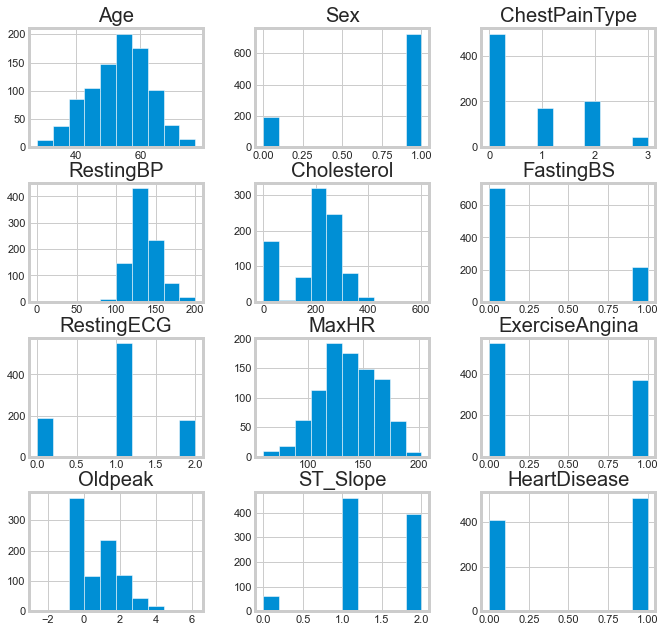

In [659]:
# Histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### Check for Class Imbalance

- A classification data set with skewed class proportions is called imbalanced. 
- Classes that make up a large proportion of the data set are called majority classes. 
- Those that make up a smaller proportion are minority classes.

> What counts as imbalanced? 

The answer could range from mild to extreme, as the table below shows.

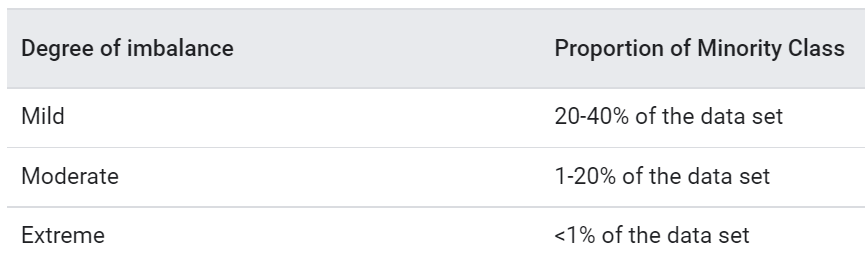

Ref : https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

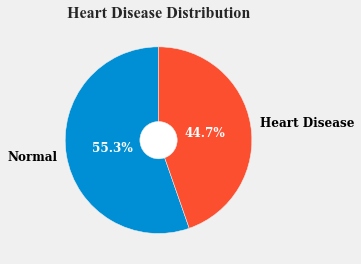

In [152]:
pred_classes = data.HeartDisease.value_counts()

plt.figure(figsize=(10, 4))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['Normal', 'Heart Disease'],
                               pctdistance=0.5,
                               shadow=False,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 12,'color': 'black','weight': 'bold','family': 'serif'})
plt.setp(pcts, color='white')
plt.title('Heart Disease Distribution', size=16,fontname="Times New Roman",fontweight="bold")

centre_circle = plt.Circle((0,0),0.20,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

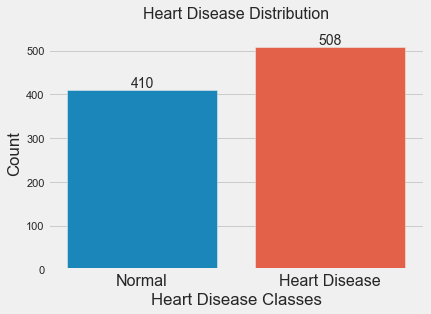

<Figure size 432x288 with 0 Axes>

In [164]:
ax = sns.countplot(data = data, x = 'HeartDisease')
plt.figure(figsize=(6, 4))
ax.bar_label(ax.containers[0])
ax.set_title('Heart Disease Distribution', y=1.05, fontsize=16)
ax.set(xlabel="Heart Disease Classes")
ax.set(ylabel="Count")
ax.set_xticklabels(['Normal', 'Heart Disease'], size=16);
plt.show()

### Conclusion:

- Number of normal cases = 410 which is around 45% of the dataset
- Number of heart disease cases = 508 which is around 55% of the dataset
- The two classes are not exactly 50% each but the ratio is good enough to continue without class imbalance handling.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Univariate analysis

Using a histogram, plot a distribution of the numerical values

In [660]:
# Numerical features
dtype = pd.DataFrame(df_info.summary().loc['types'] == 'numeric')
num_cols = dtype[dtype['types'] == True].index.to_list()
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

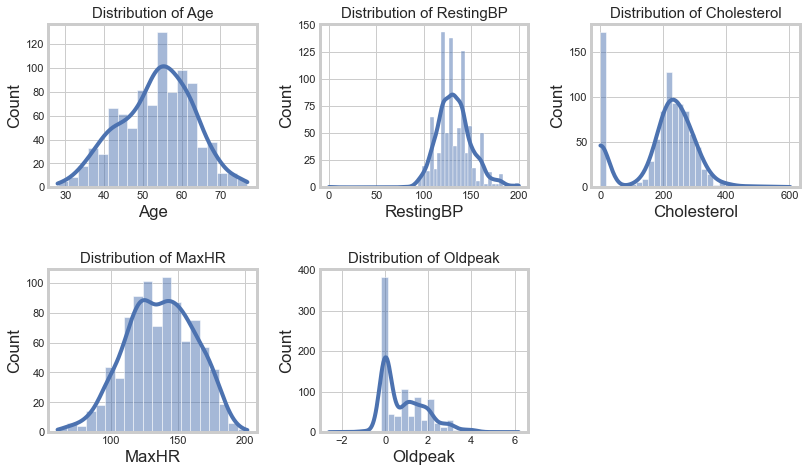

In [661]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 7))
axes = axes.flatten()

for col, ax in zip(num_cols, axes):
    ax = sns.histplot(data = df, x = col, ax = ax, kde = True)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
axes[-1].axis('off')
plt.show()

In [662]:
def dist_plot(data, column, hue = None, box = True):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {column}', y=1.05)
    sns.histplot(data = data, x = column, ax=ax0, hue = hue)
    plt.axvline(data[column].mean(), linestyle = '--', color = "red")
    
    print(f'The mean of {column} = {np.round(data[column].mean())} \nThe skewness of {column} = {np.round(data[column].skew(), 3)}')
    if box:
        ax1 = fig.add_subplot(grid[1, :])
        plt.axis('off')
        sns.boxplot(x=data[column], ax=ax1)
    else:
        pass

The mean of Age = 54.0 
The skewness of Age = -0.196


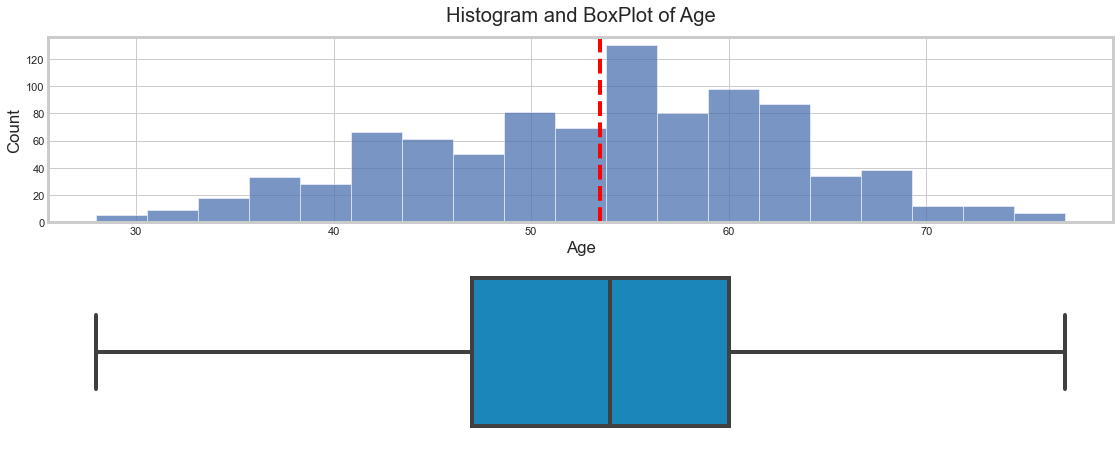

In [663]:
dist_plot(data, "Age")

The mean of RestingBP = 132.0 
The skewness of RestingBP = 0.18


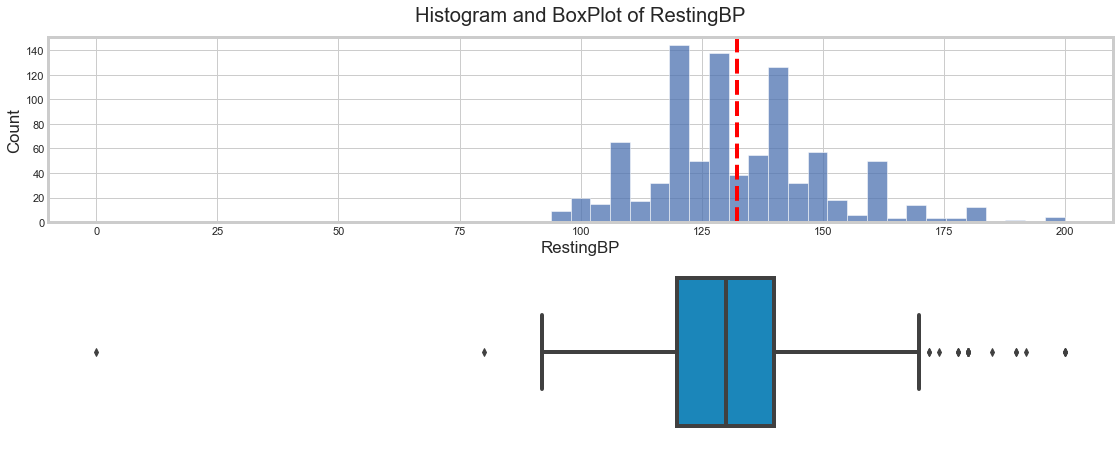

In [664]:
# Resting blood pressure
dist_plot(df, "RestingBP")

In [665]:
# There are outliers, lets try to remove it:
minimal_pressure = df[df.RestingBP < 50]
minimal_pressure

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,0,0,1,155,0,1.5,1,1


The mean of RestingBP = 133.0 
The skewness of RestingBP = 0.607


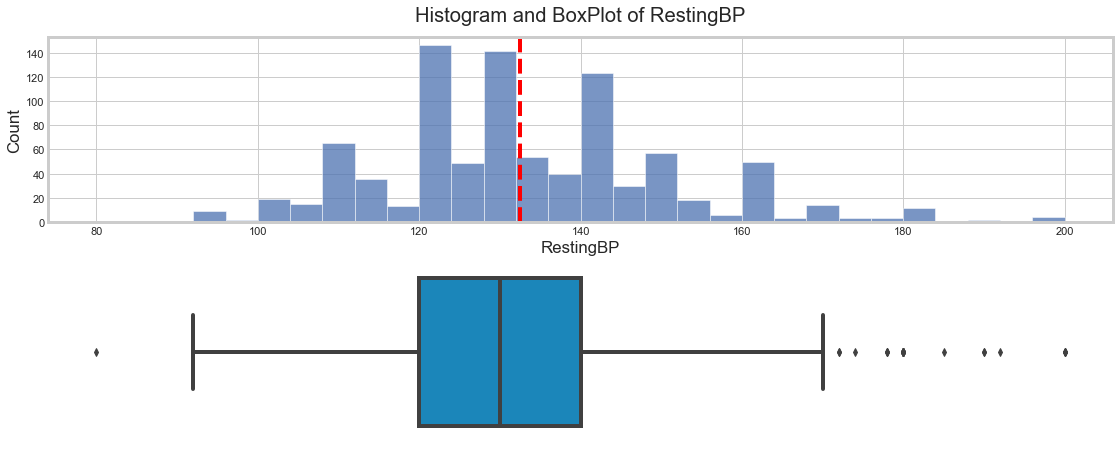

In [666]:

df = df[df.RestingBP > 50]
dist_plot(df, "RestingBP")

The mean of Cholesterol = 199.0 
The skewness of Cholesterol = -0.612


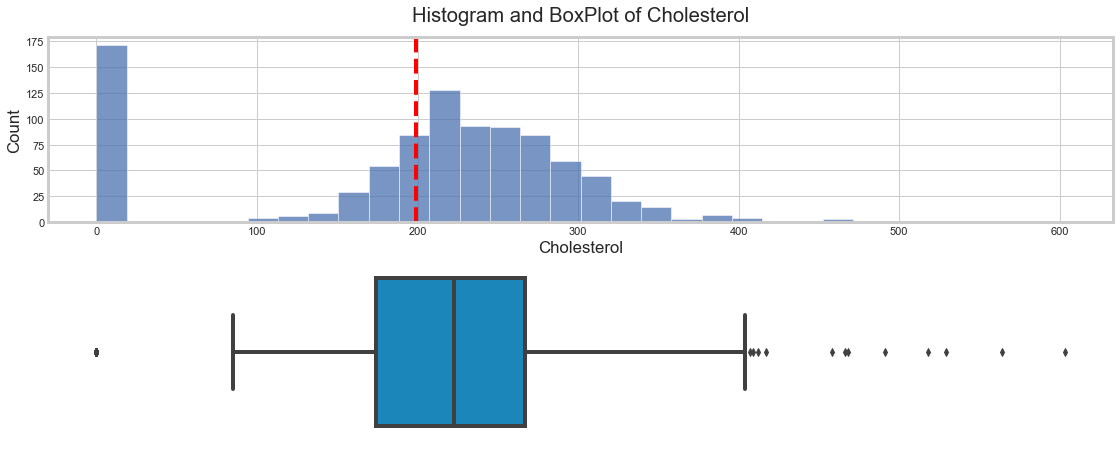

In [667]:
# Serum cholesterol [mm/dl]
dist_plot(df, "Cholesterol")

The mean of Cholesterol = 245.0 
The skewness of Cholesterol = 1.239


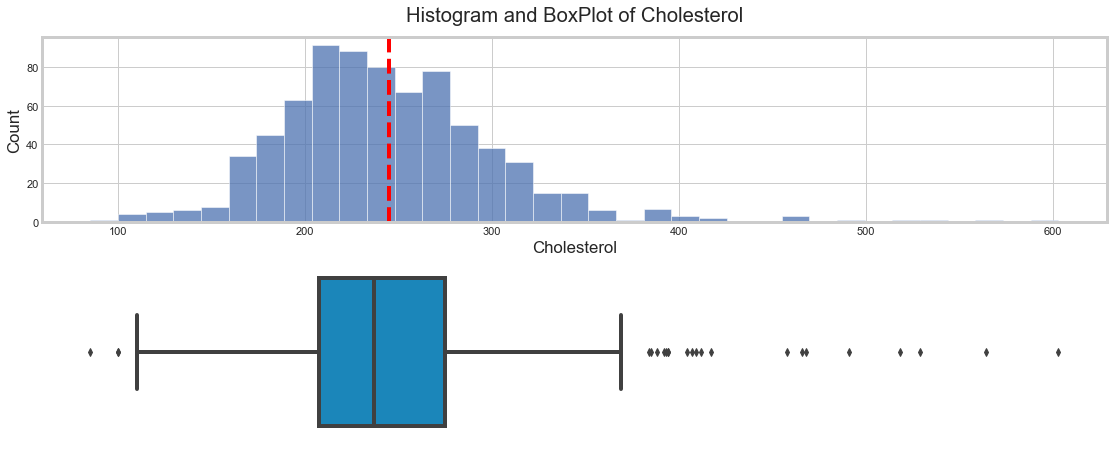

In [668]:
# Try to remove 0 Cholesterol that looks like outlier:
df = df[df.Cholesterol != 0]
dist_plot(df, "Cholesterol")

The mean of MaxHR = 137.0 
The skewness of MaxHR = -0.144


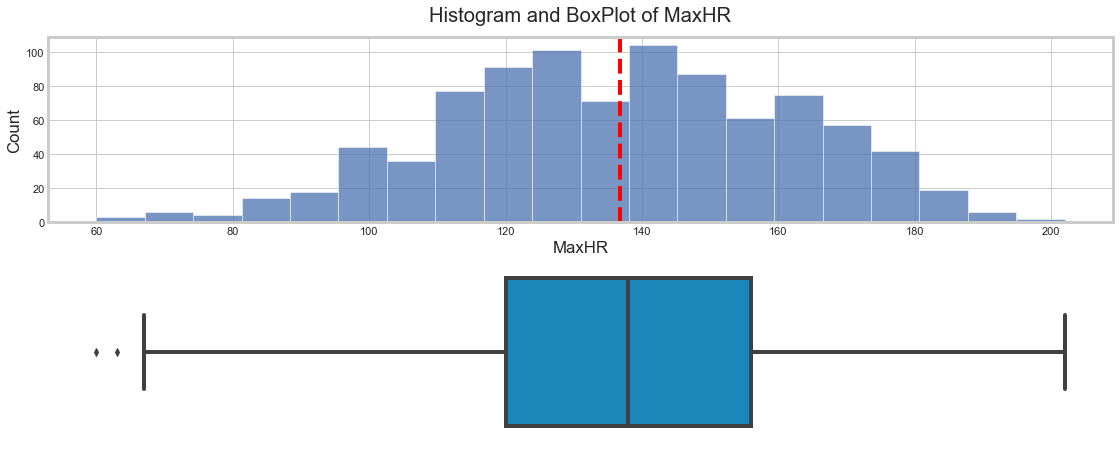

In [669]:
# Maximum heart rate achieved
dist_plot(data, "MaxHR")

The mean of Oldpeak = 1.0 
The skewness of Oldpeak = 1.023


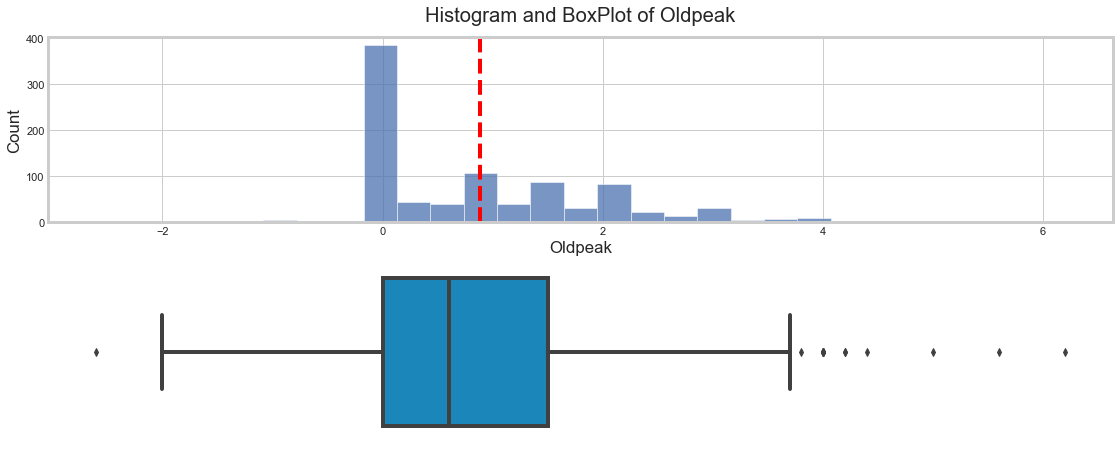

In [670]:
#Oldpeak is ST depression induced by exercise relative to rest.
dist_plot(data, 'Oldpeak')

- The features are not in perfect normal distribution and have slight skewness.
- Also, there are outliers that will be handled later.

### Bivariate analysis

The mean of Age = 53.0 
The skewness of Age = -0.103


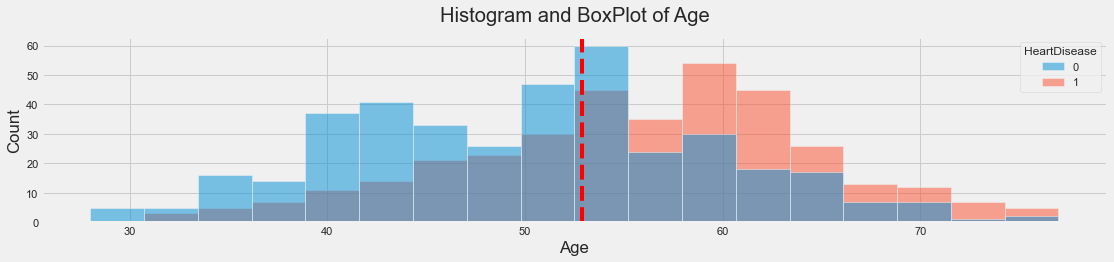

In [239]:
# Plot a histogram showing the age against the target variable (positive vs. negative cases)
dist_plot(data, "Age", hue = 'HeartDisease',box = False)

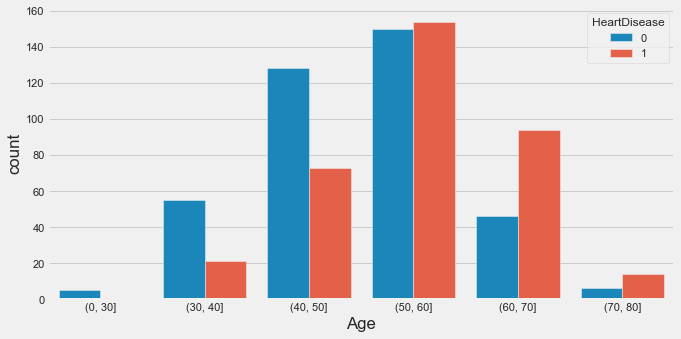

In [240]:
plt.figure(figsize=(10,5))
bins=[0,30,40,50,60, 70,80]
sns.countplot(x = pd.cut(data.Age,bins = bins),hue = data.HeartDisease)
plt.show()

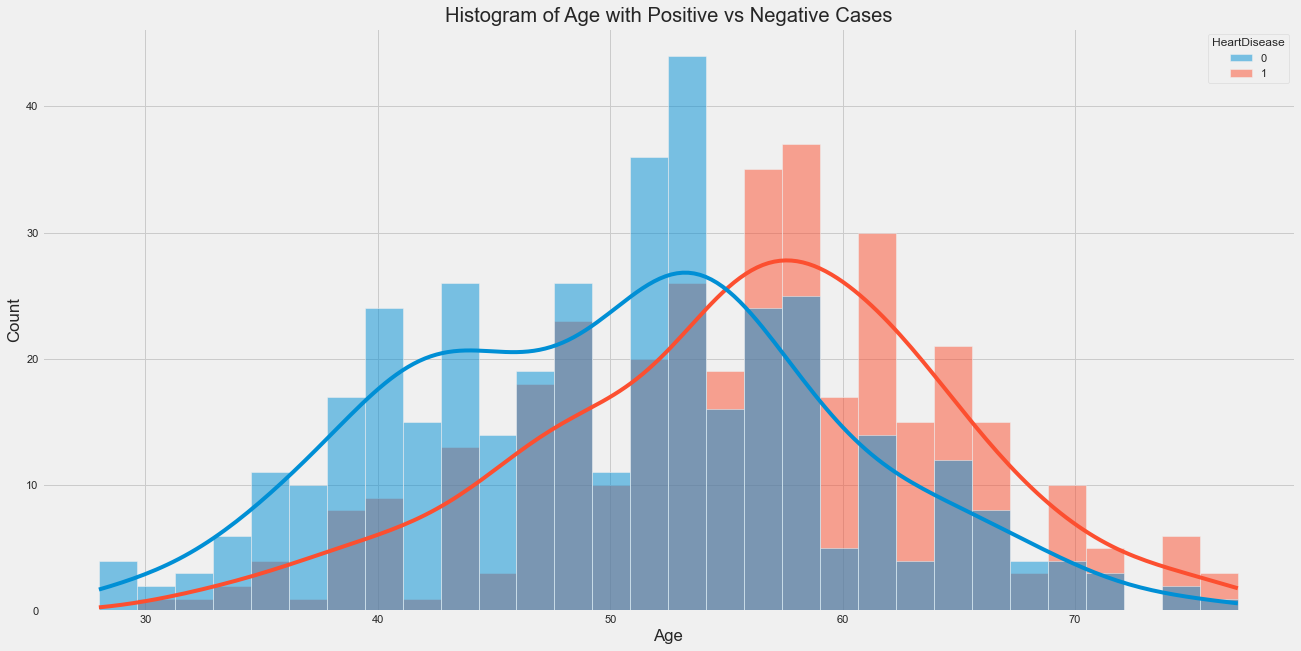

In [241]:
plt.figure(figsize=(20,10))
plt.title('Histogram of Age with Positive vs Negative Cases')
sns.histplot(data=data, x='Age', hue='HeartDisease', bins=30, kde=True);

### Conclusion
- As the age of patients increases, the risk of heart disease increases. 
- This disease affects mainly the elderly, adults age 50 and older are more likely than younger people to have heart disease.

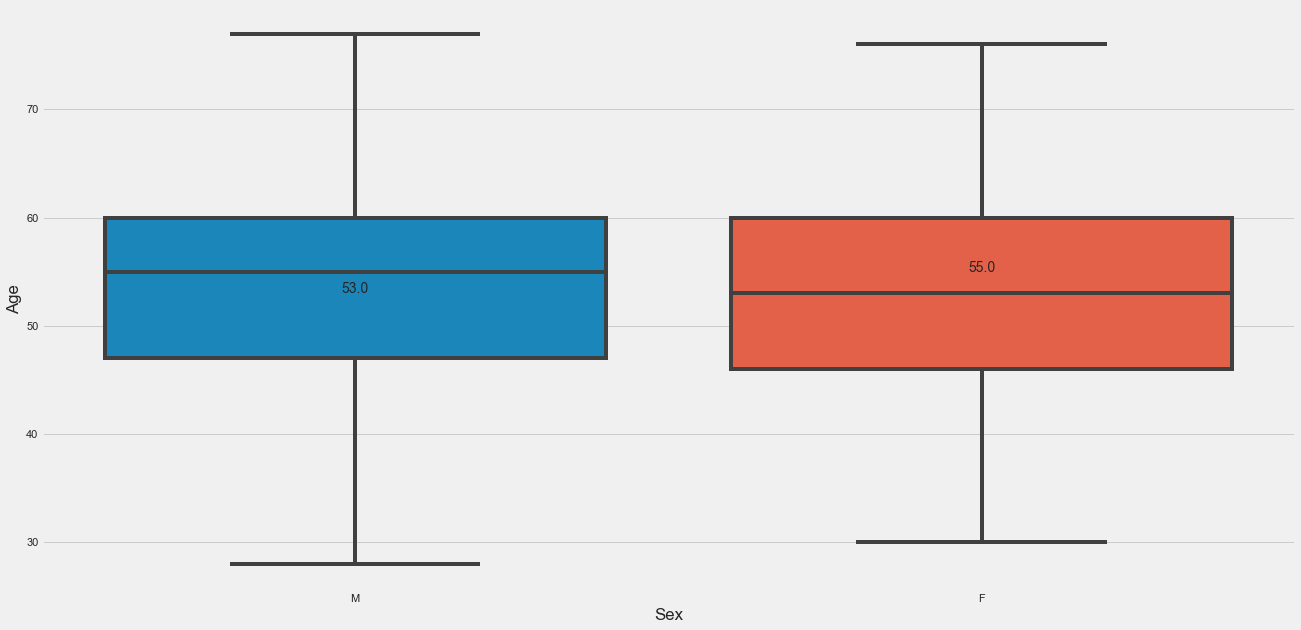

In [41]:
# Compare the median age for male and female using a boxplot
medians = data.groupby(['Sex'])['Age'].median()
plt.figure(figsize=(20,10))
box_plot = sns.boxplot(y="Age", x="Sex", data=data)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] ,medians[xtick], 
            horizontalalignment='center')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

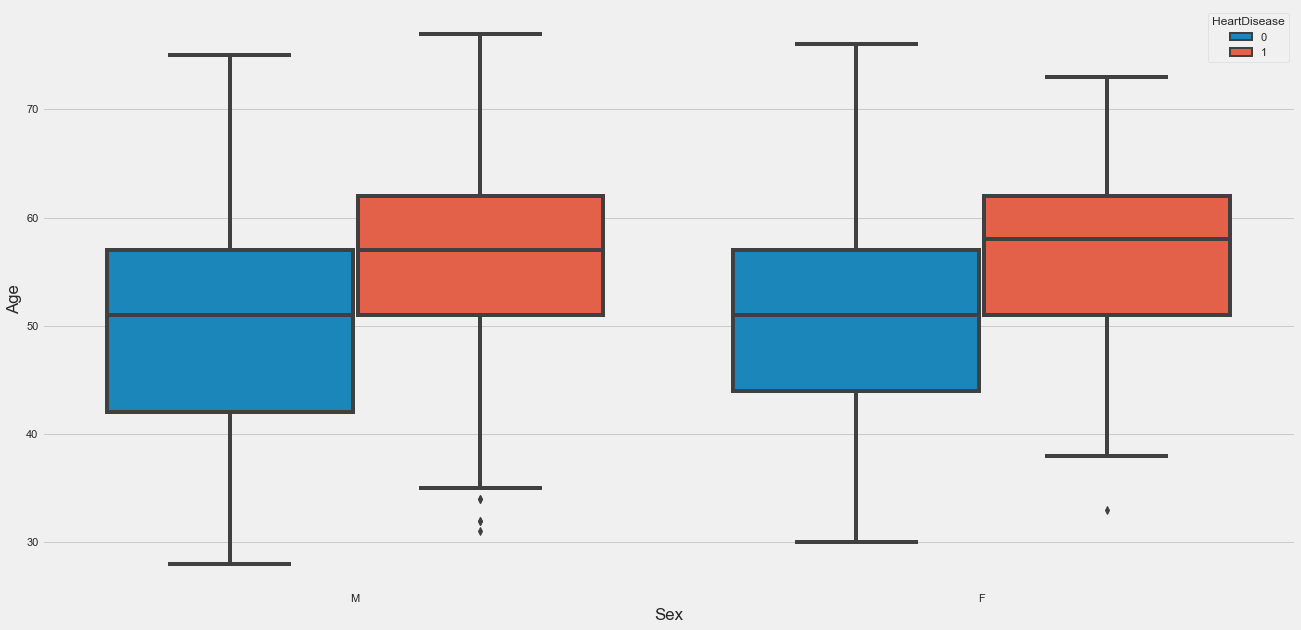

In [42]:
# Compare the median age for male and female using a boxplot
plt.figure(figsize=(20,10))
sns.boxplot(y="Age", x="Sex", hue = "HeartDisease", data=data)

### Conclusion
- The median is approximately equal for males and females.

In [671]:
df_categorical_features = data.select_dtypes(include='object')
df_categorical_features.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [672]:
# Categorical Features
cat_cols = list(set(data.columns) - set(num_cols))
cat_cols.remove('HeartDisease')

cat_cols

['ExerciseAngina',
 'Sex',
 'ChestPainType',
 'FastingBS',
 'ST_Slope',
 'RestingECG']

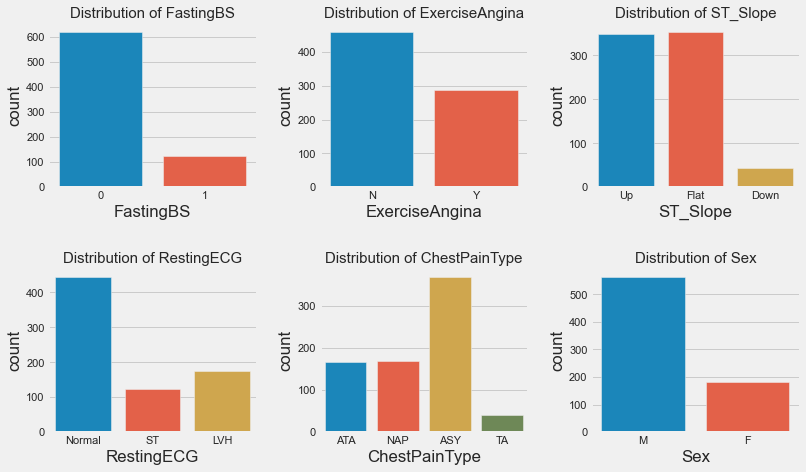

In [242]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 7))
axes = axes.flatten()

for col, ax in zip(cat_cols, axes):
    ax = sns.countplot(data = data, x = col, ax = ax)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
plt.show()

### Gender

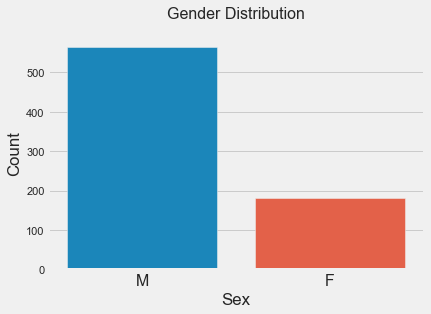

In [243]:
plt.figure(figsize=(6, 4))
gender_plot = sns.countplot(x=data.Sex)
gender_plot.set_title('Gender Distribution', fontsize=16, y=1.05)
gender_plot.set(xlabel="Sex")
gender_plot.set(ylabel="Count")
gender_plot.set_xticklabels(gender_plot.get_xticklabels(), size=16);


### Chest pain type:
- TA: Typical Angina

- ATA: Atypical Angina

- NAP: Non-Anginal Pain

- ASY: Asymptomatic

Text(0.5, 1.05, 'Chest pain type count plot & influence on heart disease')

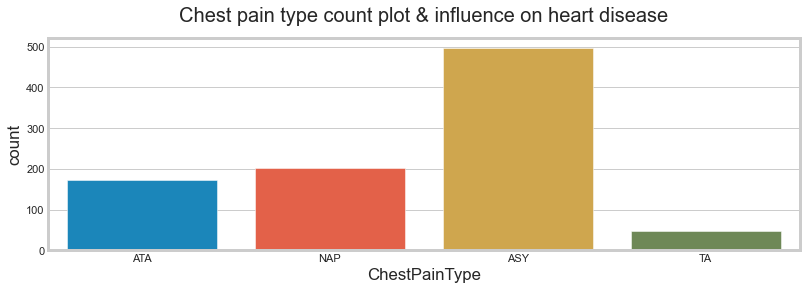

In [673]:
fig = plt.figure(figsize=(12, 8))
grid = GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :])
pain_type_plot = sns.countplot(x=data.ChestPainType, ax=ax1)
pain_type_plot.set_title('Chest pain type count plot &'
                         ' influence on heart disease',
                         fontsize=20, y=1.05)

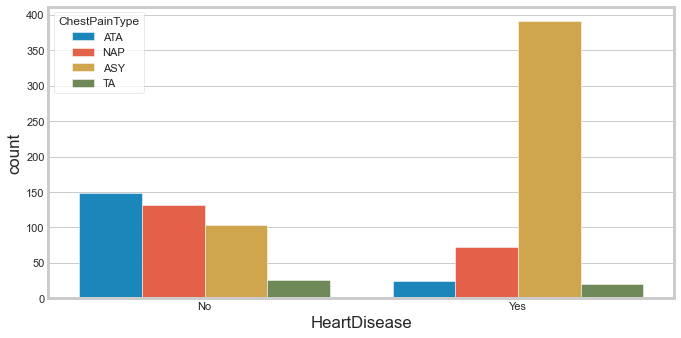

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.HeartDisease,hue=data.ChestPainType)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

#### Conclusion
Asymptomacy in the most cases has a stronger influence on
the disease’s progression, while patients with
Atypical Angina have fewer (average) cases
Asymptomatic is the most common type of chest pain among patients with heart disease

### Fasting blood sugar
- 1 -> FastingBS > 120 mg/dl
- 0 -> otherwise

[Text(0, 0, '>120'), Text(1, 0, 'other')]

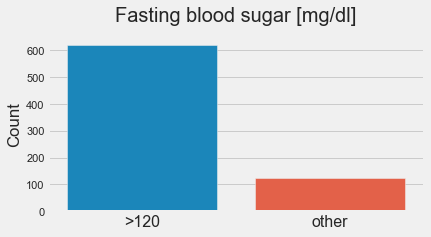

In [52]:
plt.figure(figsize=(6, 3))
active_plot = sns.countplot(x=data.FastingBS)
active_plot.set_title('Fasting blood sugar [mg/dl]', fontsize=20, y=1.05)
active_plot.set(xlabel=None)
active_plot.set(ylabel="Count")
active_plot.set_xticklabels(['>120', 'other'], size=16)

### Resting electrocardiogram results
- Normal -> Normal
- ST     -> having ST-T wave abnormality
- LVH    -> showing probable or definite left ventricular hypertrophy by Estes' criteria

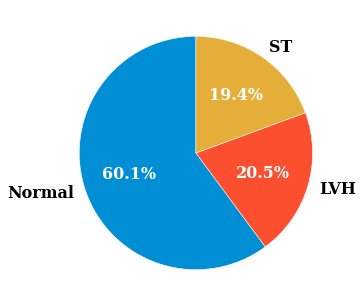

In [675]:
cardiogram_data = data.RestingECG.value_counts()
plt.figure(figsize=(10, 5))
patches, texts, pcts = plt.pie(cardiogram_data,
        labels=cardiogram_data.index,
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 16,
                   'color': 'black',
                   'weight': 'bold',
                   'family': 'serif'})
plt.setp(pcts, color='white');

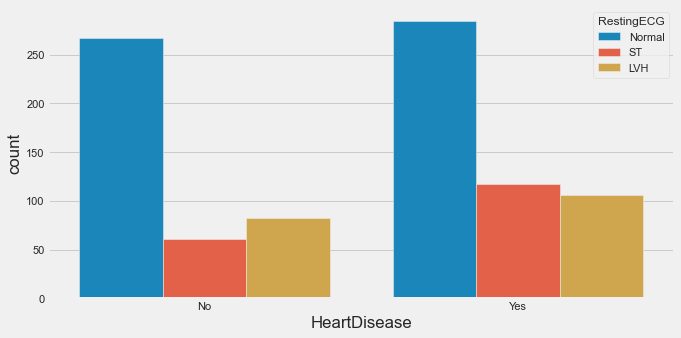

In [225]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.HeartDisease,hue=data.RestingECG)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

### ExerciseAngina

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

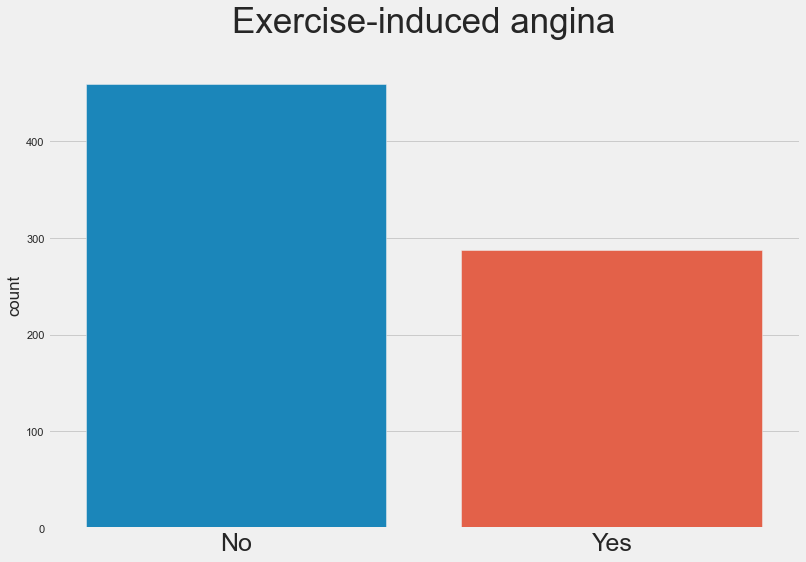

In [215]:
plt.figure(figsize=(12, 8))
exercise_angina_plot = sns.countplot(x=data.ExerciseAngina)
exercise_angina_plot.set_title('Exercise-induced angina', fontsize=35, y=1.05)
exercise_angina_plot.set(xlabel=None)
exercise_angina_plot.set_xticklabels(['No', 'Yes'], size=25)

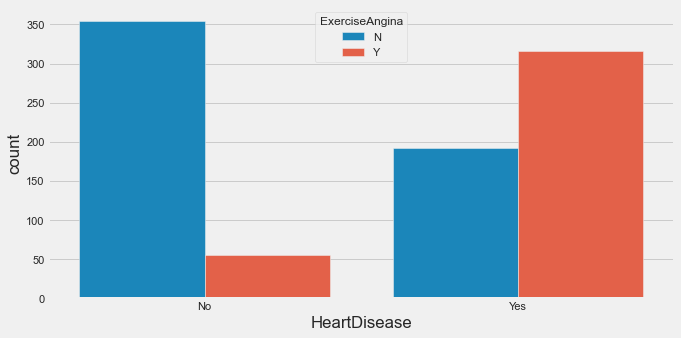

In [227]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.HeartDisease,hue=data.ExerciseAngina)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

### Slope of the peak exercise ST segment
- Up: upsloping
- Flat: flat
- Down: downsloping

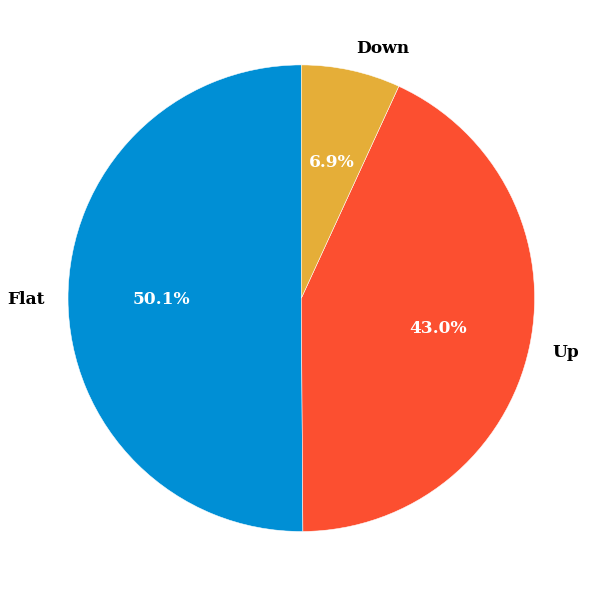

In [677]:
st_slope_data = data.ST_Slope.value_counts()

plt.figure(figsize=(15, 10))
patches, texts, pcts = plt.pie(st_slope_data,
        labels=st_slope_data.index,
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 17,
                   'color': 'black',
                   'weight': 'bold',
                   'family': 'serif'})
plt.setp(pcts, color='white');

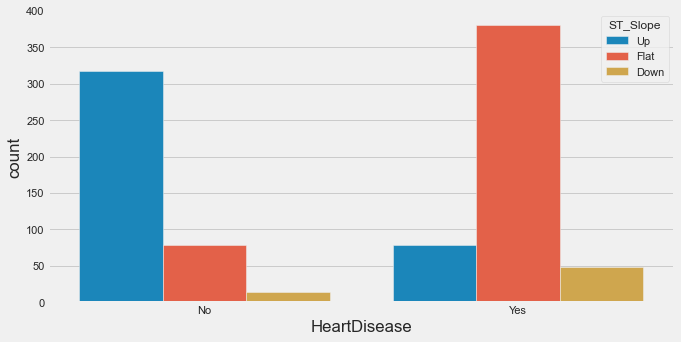

In [226]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.HeartDisease,hue=data.ST_Slope)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

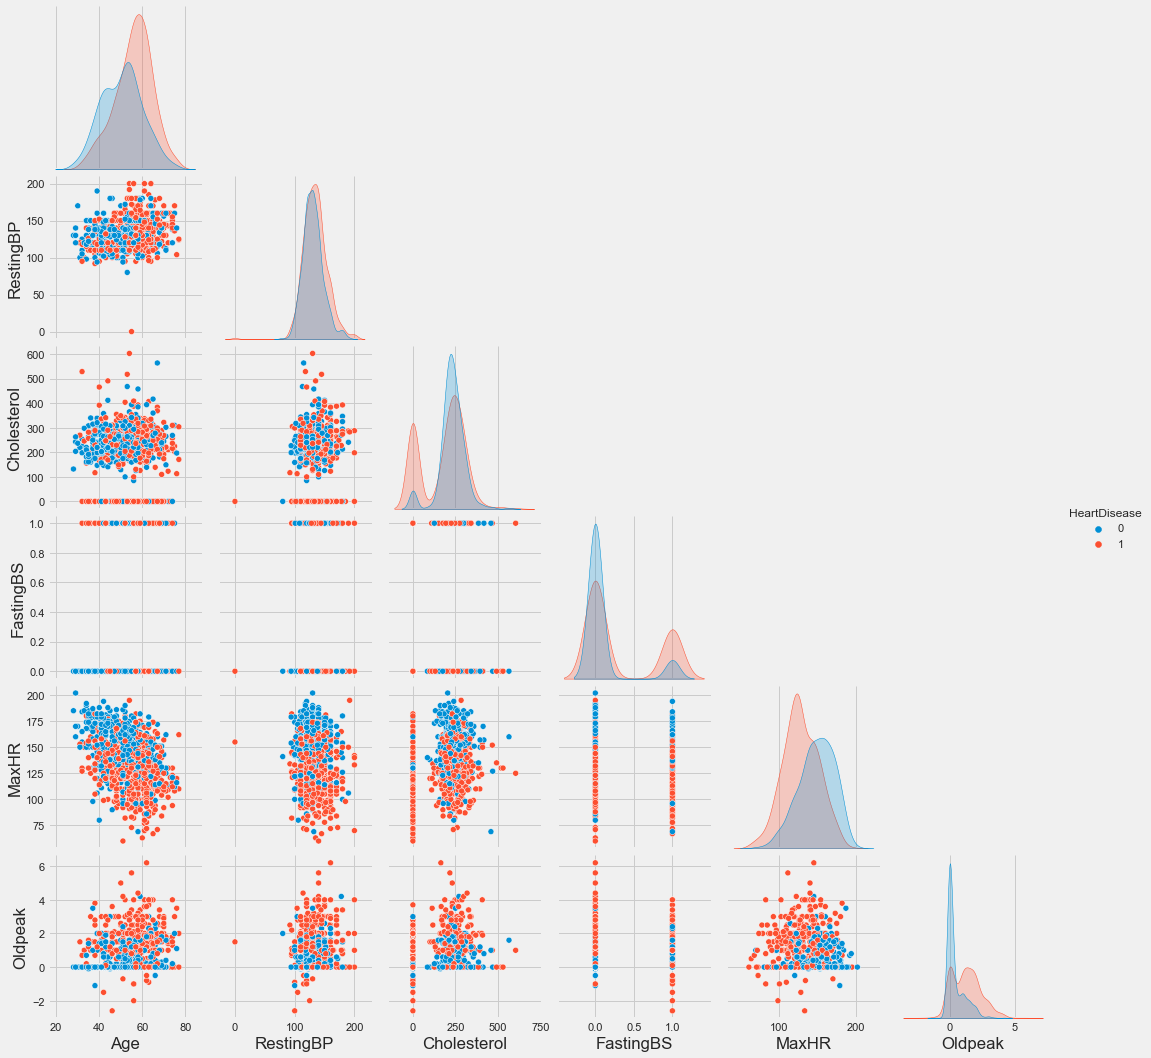

In [229]:
sns.pairplot(data,hue='HeartDisease',corner=True)

### Outliers Treatment

- We can use QuantileTransformer to map the data to a uniform distribution with the range [0, 1].
- QuantileTransformer also removes outliers.

In [67]:
# We can select the numerical variables:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_num = df[cols]

In [68]:
from sklearn.preprocessing import QuantileTransformer
quantile  = QuantileTransformer()
X = quantile.fit_transform(df_num)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns = num_cols
df_new.head()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning:

n_quantiles (1000) is greater than the total number of samples (918). n_quantiles is set to n_samples.



,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.093784,0.702290,0.849509,0.912214,0.214286
1,0.304798,0.926390,0.267721,0.754089,0.590513
2,0.046347,0.473282,0.827154,0.064340,0.214286
3,0.276990,0.629226,0.436205,0.125954,0.729553
4,0.484733,0.842421,0.318430,0.300436,0.214286


<AxesSubplot:xlabel='Oldpeak'>

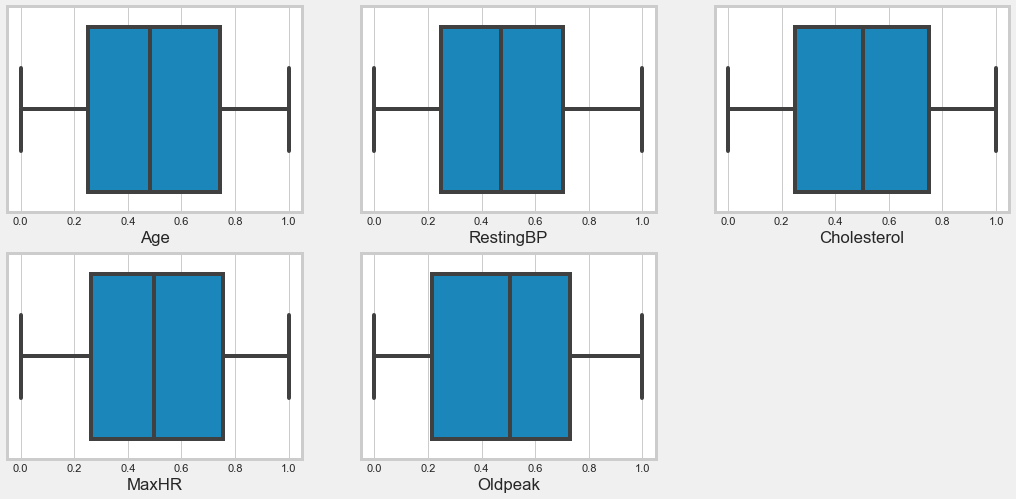

In [69]:
# Now, let's check how the data looks like after using Quantile Transformer using boxplot:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['RestingBP'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Cholesterol'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['MaxHR'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['Oldpeak'],data=df_new)

- As shown above, the data has been normalized to range [0,1] and the outliers have been removed.
- As stated in the assignment requirements, we need to use  standard scaler, so I will not use Quantile Transformer for training data. Instead, I will use another way to remove the outliers and then apply standard scaler.

#### Inter-Quartile Range (IQR) proximity rule

> We can use IQR to detect and remove the outliers.

In [678]:
# Create a function to detect the outliers and remove them.
def Outlier_removal_IQR(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    df_IQR = df.loc[(df[var] >= (Q1 - 1.5*IQR)) & (df[var] <= Q3 + 1.5*IQR)]
    return df_IQR

In [679]:
# Create a function to visualize the boxplot for features
def boxplot_cat(var, df, rotation=0):
    fig, ax = plt.subplots(figsize=(8, 4))
    fig = sns.boxplot(x=var, data=df)
    plt.title(var,fontsize = 14,fontweight='bold')
    plt.xlabel(var,fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight='bold');
    plt.yticks(fontsize=12,fontweight='bold');
    plt.xticks(rotation=rotation)

In [690]:
data_clean = data.copy()

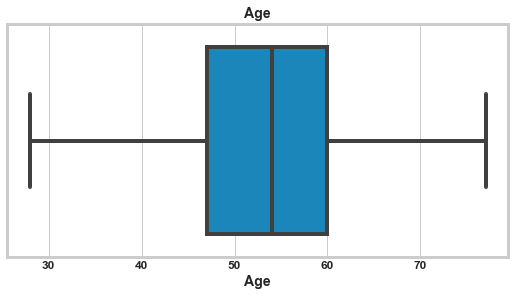

In [691]:
boxplot_cat(var = 'Age', df = data_clean)

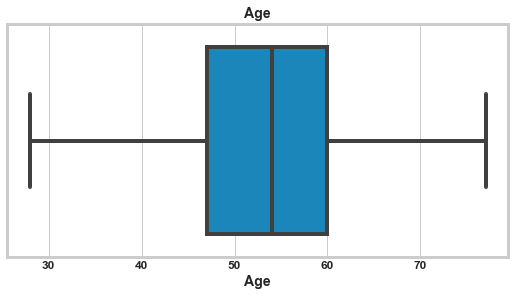

In [692]:
# It looks that Age does not have outliers, even after applying IQR, we will get same plot:
df_IQR = Outlier_removal_IQR(df = data_clean, var = 'Age')
boxplot_cat(var = 'Age', df = df_IQR)

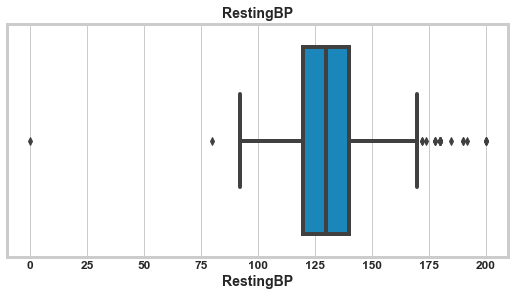

In [693]:
boxplot_cat(var = 'RestingBP', df = data_clean)
# As shown below, RestingBP has outliers; 

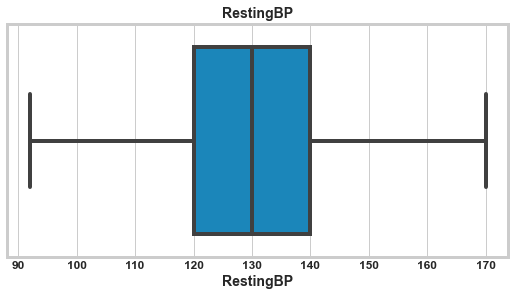

In [694]:
# Remove the outliers from the RestingBP feature using IQR
data_clean = Outlier_removal_IQR(df = data_clean, var = 'RestingBP')
boxplot_cat(var = 'RestingBP', df = data_clean)

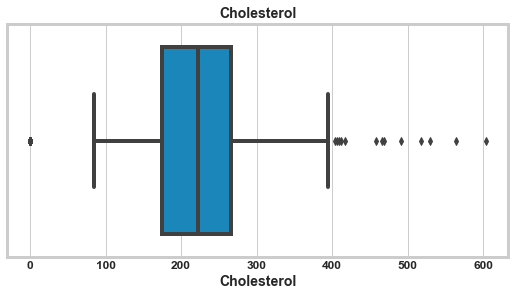

In [695]:
boxplot_cat(var = 'Cholesterol', df = data_clean)
# As shown below, Cholesterol has outliers; 

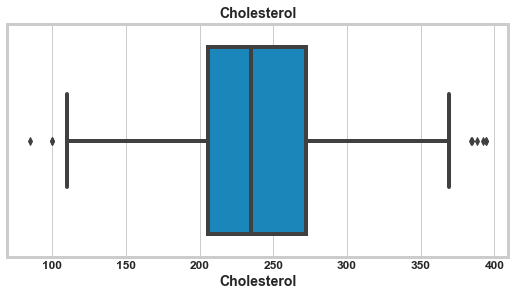

In [696]:
# Remove the outliers from the Cholesterol feature using IQR
data_clean = Outlier_removal_IQR(df = data_clean, var = 'Cholesterol')
boxplot_cat(var = 'Cholesterol', df = data_clean)

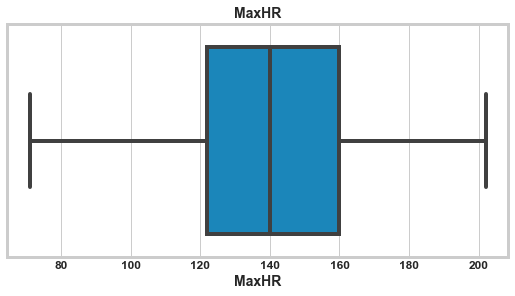

In [697]:
boxplot_cat(var = 'MaxHR', df = data_clean)
# As shown below, MaxHR has no outliers;

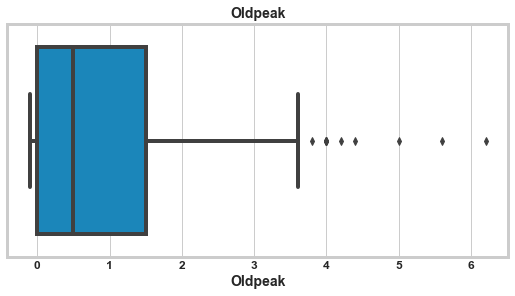

In [698]:
boxplot_cat(var = 'Oldpeak', df = data_clean)
# As shown below, MaxHR has  outliers and negative values;

In [705]:
data_clean.Oldpeak.unique()

array([0. , 1. , 1.5, 2. , 3. , 0.5, 2.5, 1.3, 1.6, 1.2, 1.9, 1.7, 0.1,
       0.4, 0.3, 0.2, 1.4, 1.1, 1.8, 3.5, 2.4, 0.6, 2.6, 3.1, 2.3, 3.4,
       0.9, 2.2, 0.8, 3.6, 3.2, 0.7, 2.1, 2.9, 2.8])

In [699]:
# Remove the negative values
data_clean = data_clean[(data_clean.Oldpeak >= 0)]

In [706]:
data_clean.Oldpeak.unique()

array([0. , 1. , 1.5, 2. , 3. , 0.5, 2.5, 1.3, 1.6, 1.2, 1.9, 1.7, 0.1,
       0.4, 0.3, 0.2, 1.4, 1.1, 1.8, 3.5, 2.4, 0.6, 2.6, 3.1, 2.3, 3.4,
       0.9, 2.2, 0.8, 3.6, 3.2, 0.7, 2.1, 2.9, 2.8])

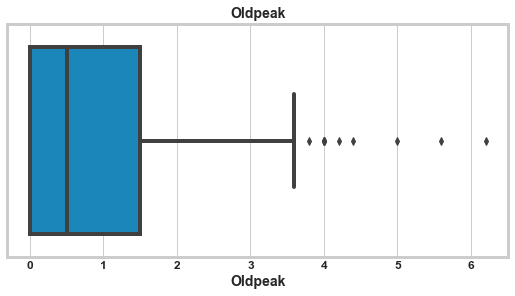

In [701]:
# It looks that Age does not have outliers, even after applying IQR, we will get same plot:
boxplot_cat(var = 'Oldpeak', df = data_clean)

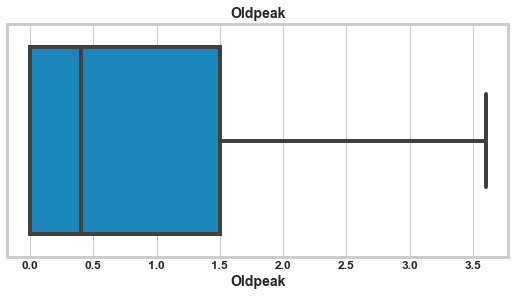

In [702]:
# Remove the outliers from the Oldpeak feature using IQR
data_clean = Outlier_removal_IQR(df = data_clean, var = 'Oldpeak')
boxplot_cat(var = 'Oldpeak', df = data_clean)

The mean of Oldpeak = 1.0 
The skewness of Oldpeak = 0.886


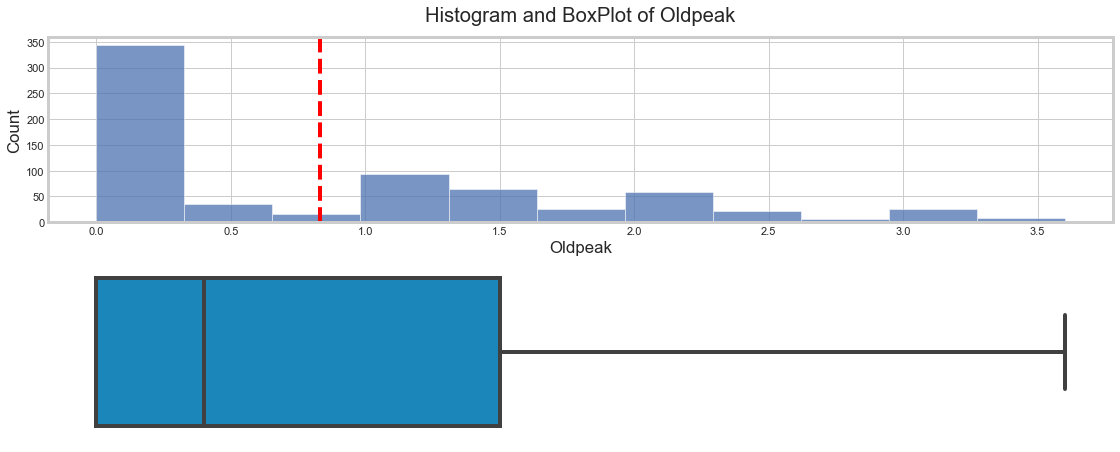

In [704]:
# Again, lets plot Oldpeak
dist_plot(data_clean, 'Oldpeak')

### Coding categorical data

In [707]:
# Coding categorical data
cat_columns = [cname for cname in data_clean.columns
                        if data_clean[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    data_clean[col] = encoder.fit_transform(data_clean[col])

## Heatmap

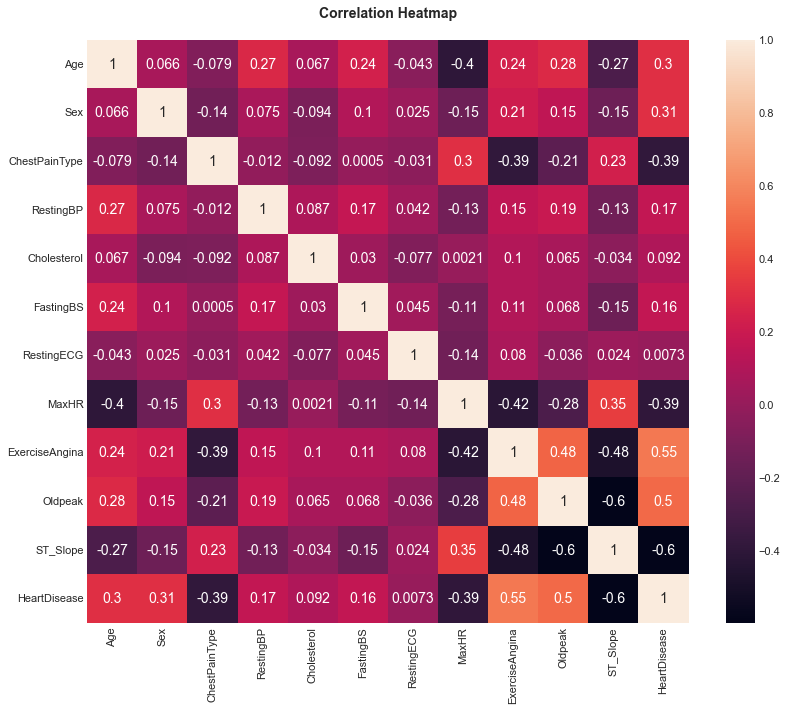

In [714]:
plt.figure(figsize=(12, 10))

corr_mask = np.triu(data_clean.corr())
h_map = sns.heatmap(data_clean.corr(), 
                    #mask=corr_mask, 
                    #cmap='Blues',
                    annot = True
                   )
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
#h_map
plt.show()

In [709]:
corr = data_clean.corr().round(2)

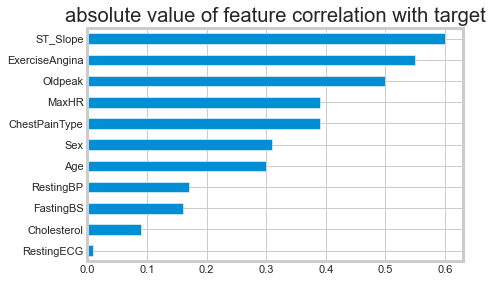

In [710]:
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.title('absolute value of feature correlation with target')
plt.show()

Strong correlation: ST, ExerciseAngina, ChestPainType, Oldpeak, MaxHR

### Define features vector X and target variable y

In [711]:
X1 = data_clean.drop(['HeartDisease'], axis=1)
y1 = data_clean.HeartDisease

#### Normalizing

In [712]:
# Features normalizing (min_max normalization)
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [713]:
# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.8, shuffle=True, random_state=1)

# Models

## Such models will be uncovered:
1. ### ML (Machine learning) models
    1. KNN (K-Nearest Neighbours)
    2. SVM
    3. DT
    4. XGboost classifiers
    5. Ensemble Method: Use a majority voting approach to predict class label using KNN (k=5), SVM (kernel = rbf), DT (with optimal tree), and XGboost classifiers based on a soft voting (i.e., weighted average)
2. ### Artificial Neural network

# Machine Learning models


In [787]:
# Function to calculate the classification metrics: Accuracy, Sensitivity, Specificity, 
# roc_auc, Confusion matrix, and Classification report
def classification_metrics(y_test_pred, y_train_pred, y_train, y_test, model_name):
    # Training accuracy
    training_accur = accuracy_score(y_train, y_train_pred)
    # Test accuracy
    test_accur = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred , average="macro")
    recall = recall_score(y_test, y_test_pred , average="macro")
    f_score = f1_score(y_test, y_test_pred , average="macro")
    
    model = {'Model': model_name, 'Training Accuracy': training_accur,
             'Test Accuracy': test_accur,'Precision':precision,
             'Recall':recall, 'f_score':f_score}
    model_df = pd.DataFrame(model, index=[0])
    #display(NB_model_df)
    
    print("\nTraining accuracy of {}: {:.3f}".format(model_name, training_accur))
    print("\nTest accuracy of {}: {:.3f}".format(model_name, test_accur))
    print("\nPrecision Score of {}: {:.3f}".format(model_name, precision))
    print("\nRecall Score of {}: {:.3f}".format(model_name, recall))
    print("\nf_score {}: {:.3f}".format(model_name, f_score))
    # Classification report
    print("\nClassification report:\n\n", classification_report(y_test,y_test_pred))
    print('Confusion Matrix:')
    
    # Confusion matrix
    font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 12}
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    #plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, cmap="Greens",fmt='d')
    plt.ylabel('Predicted',fontdict=font)
    plt.xlabel('Actual',fontdict=font)
    plt.title('Confusion Matrix',fontdict=font)
    plt.xticks(fontsize=12);plt.yticks(fontsize=12)
    plt.show()
    print('Summary of classification metrics:')
    display(model_df)
    return model_df

## KNN Model

In [715]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = [5]
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [716]:
best_model = grid_search.fit(X_train1,y_train1)

In [717]:
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

In [718]:
#Predict testing set
knn_pred = best_model.predict(X_test1)

In [719]:
print("Classification Report is:\n",classification_report(y_test1,knn_pred))
print("\n F1:\n",metrics.f1_score(y_test1,knn_pred))
print("\n Precision score is:\n",precision_score(y_test1,knn_pred))
print("\n Recall score is:\n",recall_score(y_test1,knn_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89        71
           1       0.91      0.86      0.88        69

    accuracy                           0.89       140
   macro avg       0.89      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140


 F1:
 0.8805970149253731

 Precision score is:
 0.9076923076923077

 Recall score is:
 0.855072463768116


## SVM Model

In [726]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
probability = [True]

In [727]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma, probability = probability)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [728]:
grid_result = grid_search.fit(X_train1, y_train1)

In [729]:
svm_pred=grid_result.predict(X_test1)

In [730]:
grid_result.best_estimator_.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [731]:
print("Classification Report is:\n",classification_report(y_test1,svm_pred))
print("\n F1:\n",f1_score(y_test1,svm_pred))
print("\n Precision score is:\n",precision_score(y_test1,svm_pred))
print("\n Recall score is:\n",recall_score(y_test1,svm_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        71
           1       0.86      0.78      0.82        69

    accuracy                           0.83       140
   macro avg       0.83      0.83      0.83       140
weighted avg       0.83      0.83      0.83       140


 F1:
 0.8181818181818182

 Precision score is:
 0.8571428571428571

 Recall score is:
 0.782608695652174


## DT Model

In [732]:
dt = DecisionTreeClassifier()

In [739]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [740]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

In [741]:
best_model=grid_search.fit(X_train1, y_train1)

Fitting 30 folds for each of 40 candidates, totalling 1200 fits


In [742]:
best_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [743]:
dt_pred=best_model.predict(X_test1)

In [744]:
print("Classification Report is:\n",classification_report(y_test1,dt_pred))
print("\n F1:\n",f1_score(y_test1,dt_pred))
print("\n Precision score is:\n",precision_score(y_test1,dt_pred))
print("\n Recall score is:\n",recall_score(y_test1,dt_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        71
           1       0.81      0.75      0.78        69

    accuracy                           0.79       140
   macro avg       0.79      0.79      0.79       140
weighted avg       0.79      0.79      0.79       140


 F1:
 0.7819548872180452

 Precision score is:
 0.8125

 Recall score is:
 0.7536231884057971


## XGboost Model

In [745]:
# XGboost :Sklearn gradient boosted trees
GBC1 = GradientBoostingClassifier(n_estimators = 100)
GBC1.fit(X_train1, y_train1)

GradientBoostingClassifier()

In [746]:
GBC1_pred = GBC1.predict(X_test1)

In [747]:
print("Classification Report is:\n",classification_report(y_test1,GBC1_pred))
print("\n Accuracy:\n",accuracy_score(y_test1,GBC1_pred))
print("\n F1:\n",f1_score(y_test1,GBC1_pred))
print("\n Precision score is:\n",precision_score(y_test1,GBC1_pred))
print("\n Recall score is:\n",recall_score(y_test1,GBC1_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        71
           1       0.88      0.86      0.87        69

    accuracy                           0.87       140
   macro avg       0.87      0.87      0.87       140
weighted avg       0.87      0.87      0.87       140


 Accuracy:
 0.8714285714285714

 F1:
 0.8676470588235295

 Precision score is:
 0.8805970149253731

 Recall score is:
 0.855072463768116


In [748]:
# XGBoost 
GBC2 = XGBClassifier()
GBC2.fit(X_train1, y_train1)

[22:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [750]:
GBC2_pred = GBC2.predict(X_test1)
print("Classification Report is:\n",classification_report(y_test1,GBC2_pred))
print("\n Accuracy:\n",accuracy_score(y_test1,GBC2_pred))
print("\n F1:\n",f1_score(y_test1,GBC2_pred))
print("\n Precision score is:\n",precision_score(y_test1,GBC2_pred))
print("\n Recall score is:\n",recall_score(y_test1,GBC2_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        71
           1       0.86      0.81      0.84        69

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140


 Accuracy:
 0.8428571428571429

 F1:
 0.835820895522388

 Precision score is:
 0.8615384615384616

 Recall score is:
 0.8115942028985508


In [751]:
# Models with tuned parameters:
SVM = SVC(kernel = 'rbf',random_state=None, probability=True, C = 0.1)
KNC = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan',  p=1, weights = 'distance')
DTC = DecisionTreeClassifier(max_depth = 5, criterion = "gini", min_samples_leaf = 50)
GBC = GradientBoostingClassifier(n_estimators = 100)
#GBC = XGBClassifier(n_estimators = 100)

In [753]:
clfs = []
acc = []
print('5-fold cross validation:\n')
for clf, label in zip([SVM, KNC, DTC,GBC],
                      ['Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Gradient Boosting']):
    scores = model_selection.cross_val_score(clf, X_train1, y_train1, cv=5, scoring='accuracy') 
    print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train1, y_train1)
    clfs.append(md)
    acc1 = metrics.accuracy_score(clf.predict(X_test1), y_test1)
    acc.append(acc1)
    print("Test Accuracy: %0.2f " % (acc1))


5-fold cross validation:

Train CV Accuracy: 0.85 (+/- 0.01) [Support Vector Machine]
Test Accuracy: 0.83 
Train CV Accuracy: 0.85 (+/- 0.04) [KNeighbors]
Test Accuracy: 0.88 
Train CV Accuracy: 0.80 (+/- 0.02) [Decision Tree]
Test Accuracy: 0.79 
Train CV Accuracy: 0.87 (+/- 0.03) [Gradient Boosting]
Test Accuracy: 0.87 


In [754]:
acc

[0.8285714285714286,
 0.8785714285714286,
 0.7928571428571428,
 0.8714285714285714]

In [755]:
# ### Ensemble Voting
clfs = []
print('5-fold cross validation:\n')
ECH = VotingClassifier(estimators=[('SVM', SVM), ('knn', KNC), ('DTC', DTC),('GBC',GBC)], voting='hard')

ECS = VotingClassifier(estimators=[('SVM', SVM), ('knn', KNC), ('DTC', DTC),('GBC',GBC)], voting='soft', weights=[1, 1, 1,1])
for clf, label in zip([ECH, ECS],
                      ['Ensemble Hard Voting',
                       'Ensemble Soft Voting']):
    scores = model_selection.cross_val_score(clf, X_train1, y_train1, cv=5, scoring='accuracy')
    print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train1, y_train1)
    clfs.append(md)
    print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict (X_test1), y_test1)))

5-fold cross validation:

Train CV Accuracy: 0.85 (+/- 0.03) [Ensemble Hard Voting]
Test Accuracy: 0.84 
Train CV Accuracy: 0.85 (+/- 0.03) [Ensemble Soft Voting]
Test Accuracy: 0.87 


In [756]:
# The above results related to equal weights [1,1,1,1]
# We can use weighted average of accuracy

# evaluate each base model
def evaluate_models1(models, X_train1, y_train1):
    scores = list()
    for name, model in models:
        score = model_selection.cross_val_score(model, X_train1, y_train1, cv=5, scoring='accuracy')
        scores.append(score.mean())
    return scores

In [757]:
models = [('SVM', SVM), ('knn', KNC), ('DTC', DTC),('GBC',GBC)]

In [758]:
# fit and evaluate each model
scores = evaluate_models1(models, X_train1, y_train1)
scores

[0.85, 0.85, 0.8035714285714286, 0.8678571428571427]

In [760]:
# create the ensemble   
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)

In [761]:
# fit the ensemble on the training dataset
ensemble.fit(X_train1, y_train1)
# make predictions on test set
yhat = ensemble.predict(X_test1)
# evaluate predictions
score = accuracy_score(y_test1, yhat)
print('Weighted Avg Accuracy: %.3f' % (score*100))

Weighted Avg Accuracy: 87.143


In [767]:
y_train_pred_ESV_Weighted_Avg = ensemble.predict(X_train1)


Training accuracy of ESV_Weighted_Avg: 0.970

Test accuracy of ESV_Weighted_Avg: 0.871

Precision Score of ESV_Weighted_Avg: 0.872

Recall Score of ESV_Weighted_Avg: 0.871

f_score ESV_Weighted_Avg: 0.871

Classification report:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88        71
           1       0.88      0.86      0.87        69

    accuracy                           0.87       140
   macro avg       0.87      0.87      0.87       140
weighted avg       0.87      0.87      0.87       140

Confusion Matrix:


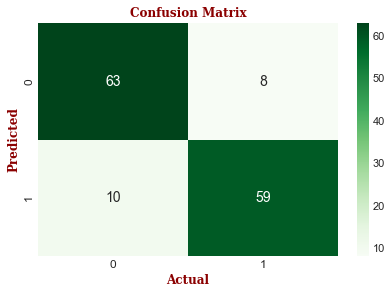

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,ESV_Weighted_Avg,0.969643,0.871429,0.871805,0.871198,0.871324


In [768]:
model_name = 'ESV_Weighted_Avg'
ESV_df = classification_metrics(yhat, y_train_pred_ESV_Weighted_Avg, 
                                y_train1, y_test1, model_name)

In [762]:
# Ensemble Hard Voting (EHV)
EHV = clfs[0]
y_test_pred_EHV = EHV.predict(X_test1)
y_train_pred_EHV = EHV.predict(X_train1)


Training accuracy of EHV: 0.916

Test accuracy of EHV: 0.843

Precision Score of EHV: 0.850

Recall Score of EHV: 0.842

f_score EHV: 0.842

Classification report:

               precision    recall  f1-score   support

           0       0.80      0.92      0.86        71
           1       0.90      0.77      0.83        69

    accuracy                           0.84       140
   macro avg       0.85      0.84      0.84       140
weighted avg       0.85      0.84      0.84       140

Confusion Matrix:


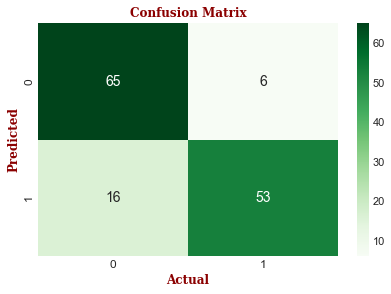

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,EHV,0.916071,0.842857,0.850387,0.841804,0.841694


In [763]:
model_name = 'EHV'
EHV_df = classification_metrics(y_test_pred_EHV, y_train_pred_EHV, y_train1, y_test1, model_name)

In [797]:
# Ensemble Soft Voting (ESV)
ESV = clfs[1]
y_test_pred_ESV = ESV.predict(X_test1)
y_train_pred_ESV = ESV.predict(X_train1)


Training accuracy of ESV: 0.968

Test accuracy of ESV: 0.871

Precision Score of ESV: 0.872

Recall Score of ESV: 0.871

f_score ESV: 0.871

Classification report:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88        71
           1       0.88      0.86      0.87        69

    accuracy                           0.87       140
   macro avg       0.87      0.87      0.87       140
weighted avg       0.87      0.87      0.87       140

Confusion Matrix:


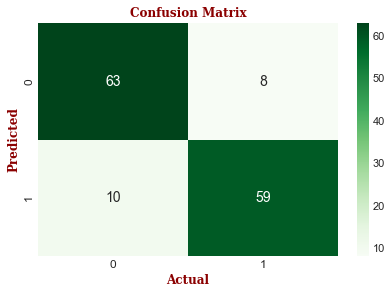

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,ESV,0.967857,0.871429,0.871805,0.871198,0.871324


In [798]:
model_name = 'ESV'
ESV_df = classification_metrics(y_test_pred_ESV, y_train_pred_ESV, y_train1, y_test1, model_name)

The accuracy obtained using weighted average of accuracy is approximately equal to the accuarcy with equal weights

# Model Development II (Deep Learning:Artificial Neural Network)

In [769]:
# Features
X = data_clean.drop('HeartDisease', axis = 1) # selecting all columns except the target
# Target variable
y = data_clean['HeartDisease']

In [770]:
os.environ["KMP_SETTINGS"] = "false" # to avoid a huge warning about sort of settings

In [771]:
y = keras.utils.to_categorical(y, 2)
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)

In [772]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [780]:
model = keras.Sequential([
    
    keras.layers.Dense(16, activation='relu',input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(11, activation='relu'),
    keras.layers.Dropout(0.1),

    
    keras.layers.Dense(2, activation='softmax')
    ])

# compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

#fitting the model
history = model.fit(X_train, y_train, batch_size=10, epochs=100,
                    validation_data=(X_val, y_val), verbose=0)

score = np.round(model.evaluate(X_val, y_val, verbose=0)[1], 3)
print(f'Neural Network score =  {score}')


Neural Network score =  0.857


**Playing with rate:**

Neural Network score    ========>>> 0.869 at 0.05

Neural Network score    ========>>> 0.869 at 0.1

Neural Network score    ========>>> 0.884 at 0.3

Neural Network score    ========>>> 0.884 at 0.2

Neural Network score    ========>>> 0.88  at 0.5

Neural Network score    ========>>> 0.854 at 0.7

Neural Network score    ========>>> 0.603 at 0.9

As dropout rate increases, the accuracy slightly decreases. At rate of 0.3, I got 0.88 accuracy. In general, dropout layers decreases the training acuracy where the training accuracy is higher when dropout layers are not included. So, dropout layers help to avoid overfitting.

The accuracy changes each run..

**Playing with activation functions:**

Neural Network score    ========>>> 0.846 for sigmoid output layer

Neural Network score    ========>>> 0.816 for sigmoid all layers

Neural Network score    ========>>> 0.843 for tanh output layer

Neural Network score    ========>>> 0.824 for tanh all layers

Neural Network score    ========>>> 0.816 for tanh in input amd hidden layers, softmax for output

Neural Network score    ========>>> 0.858 for ReLU in input amd hidden layers, softmax for output

The best results I got with ReLU in input amd hidden layers, and softmax for output layer.

In [599]:
def history_plot(history):
    fig = plt.figure(figsize=(12, 8))
    plt.plot(history.history['acc'], label="Train Accuracy")
    plt.plot(history.history['val_acc'], label="Test Accuracy")
    plt.legend()
    
def loss_plot(history):
    fig = plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Test Loss")
    plt.legend()

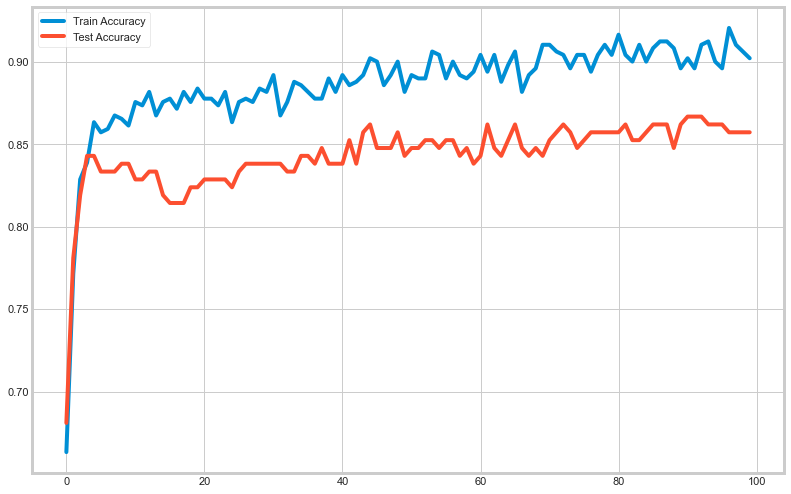

In [781]:
history_plot(history)

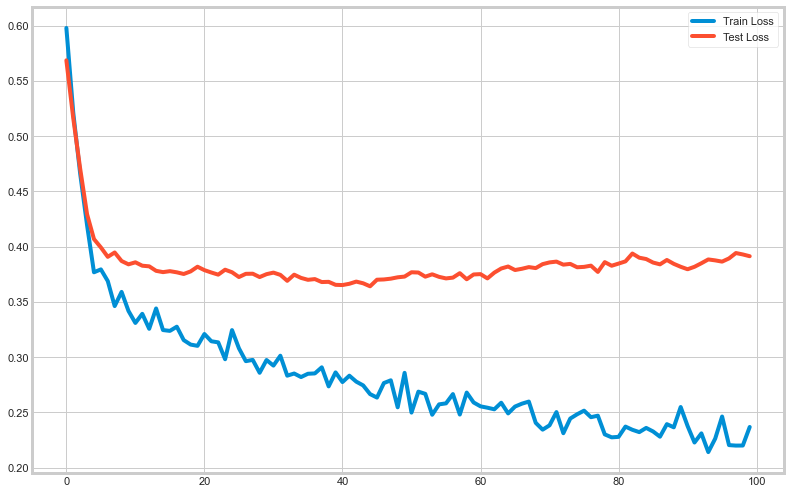

In [782]:
loss_plot(history)

In [783]:
# Use sklearn classification report
from sklearn.metrics import classification_report
#y_val = np.argmax(y_val, axis=1)
y_pred = model.predict(X_val, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_val, axis=1), y_pred_bool))

4/4 [==============================] - 0s 1000us/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.87      0.84      0.85       105

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210



In [784]:
y_train_pred_ANN = model.predict(X_train)
y_train_pred_ANN = np.argmax(y_train_pred_ANN, axis=1)

In [785]:
y_pred1 = model.predict(X_val)
y_pred = np.argmax(y_pred1, axis=1)


Training accuracy of ANN: 0.927

Test accuracy of ANN: 0.857

Precision Score of ANN: 0.858

Recall Score of ANN: 0.857

f_score ANN: 0.857

Classification report:

               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.87      0.84      0.85       105

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210

Confusion Matrix:


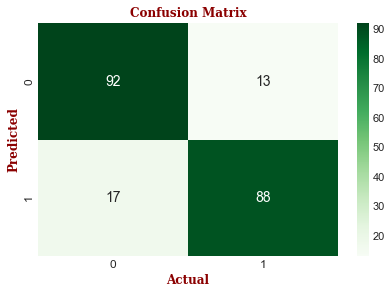

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,ANN,0.926531,0.857143,0.857662,0.857143,0.857091


In [786]:
model_name = 'ANN'
ANN_df = classification_metrics(y_pred, y_train_pred_ANN, np.argmax(y_train, axis=1), 
                                np.argmax(y_val, axis=1), model_name)

## Model Comparison, Evaluation


In [799]:
df_summary = pd.DataFrame()
models=[EHV_df, ESV_df, ANN_df]

for df in models:
    df_summary=df_summary.append(df).reset_index().drop('index', axis=1)
df_summary

,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,EHV,0.916071,0.842857,0.850387,0.841804,0.841694
1,ESV,0.967857,0.871429,0.871805,0.871198,0.871324
2,ANN,0.926531,0.857143,0.857662,0.857143,0.857091


In [800]:
df_summary.sort_values('Test Accuracy', ascending=False).reset_index().drop('index', axis=1) # And sort it by Test Accuracy:

,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,ESV,0.967857,0.871429,0.871805,0.871198,0.871324
1,ANN,0.926531,0.857143,0.857662,0.857143,0.857091
2,EHV,0.916071,0.842857,0.850387,0.841804,0.841694


In [801]:
df_summary.set_index('Model',inplace=True)
df_summary

,Training Accuracy,Test Accuracy,Precision,Recall,f_score
Model,,,,,
EHV,0.916071,0.842857,0.850387,0.841804,0.841694
ESV,0.967857,0.871429,0.871805,0.871198,0.871324
ANN,0.926531,0.857143,0.857662,0.857143,0.857091


**Abbreviations**:
    
>**EHV:** Ensemble Hard Voting

>**ESV:** Ensemble Soft Voting

>**ANN:** Artificial Neural Network

**Conclusion**

- In term of training accuracy, the models have accuarcy over 90%, EHV model and ANN model have around 92% accuracy where Ensemble Soft Voting has the highest value of 97%.

- In term of test accuracy, ESV model has the highest value of 87% followed by ANN. EHV model has accuracy slightly lower than ANN model. Regarding Precision, ESV model has the highest value of 87% followed by ANN (86%) as well. Also, EHV model has accuracy slightly lower than ANN model. Same conclusion can be obtained regarding  Recall and f score, ESV is the highest followed by ANN, EHV is the lowest.

- In general, ESV has the highest metrics overall followed by ANN. EHV is the lowest.
 
- When comparing Ensemble method with deep learning, Ensemble Soft Voting (ESV) slightly performed better than deep learning (ANN model).


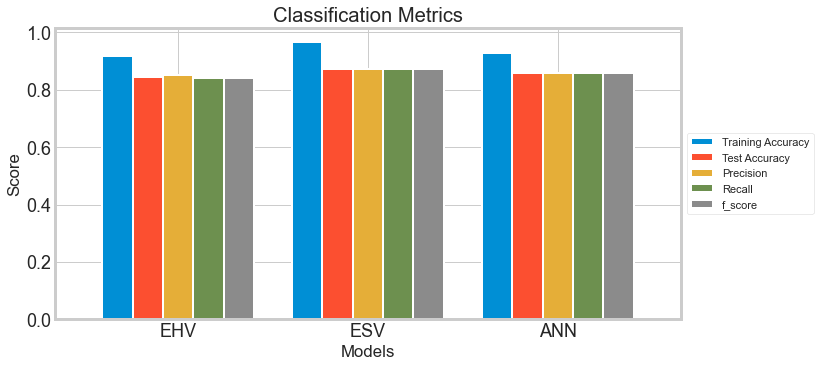

In [802]:
ax = df_summary.plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Classification Metrics",alpha=1,
                            edgecolor='white', linewidth=2).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.show(block=True)

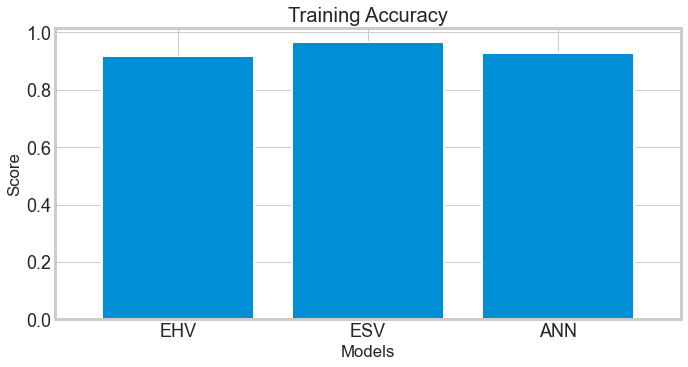

In [803]:
ax = df_summary['Training Accuracy'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Training Accuracy",alpha=1,
                            edgecolor='white', linewidth=2)
plt.show(block=True)

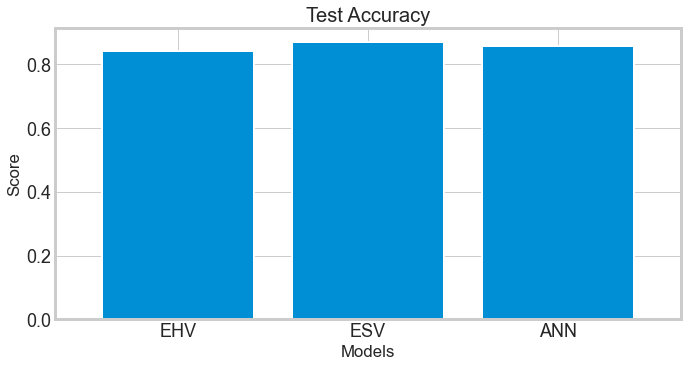

In [804]:
ax = df_summary['Test Accuracy'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Test Accuracy",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

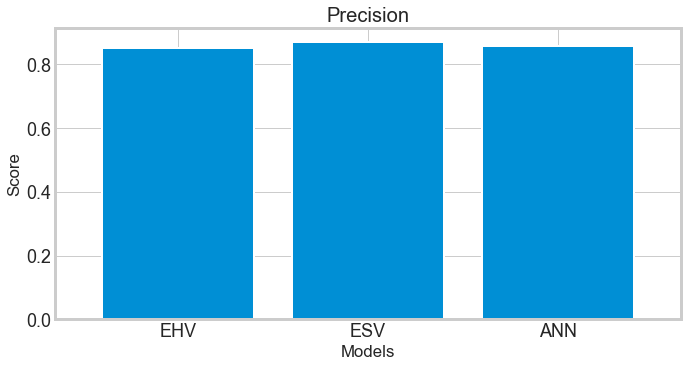

In [805]:
ax = df_summary['Precision'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Precision",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

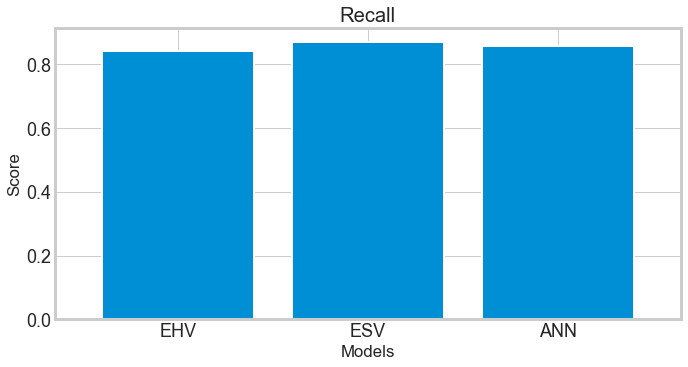

In [806]:
ax = df_summary['Recall'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Recall",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

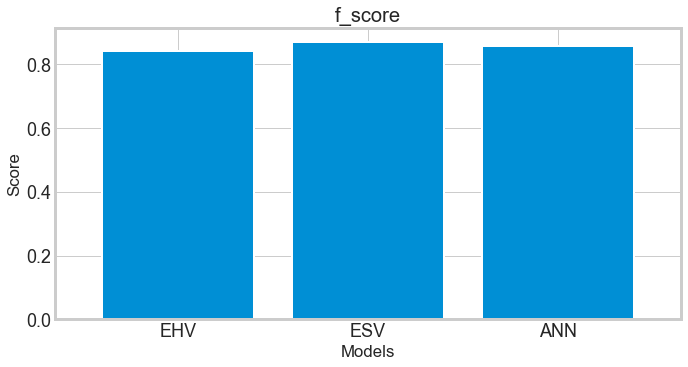

In [807]:
ax = df_summary['f_score'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="f_score",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)